In [1]:
from methods import *
import matplotlib.pyplot as plt
from PIL import Image

# Obtener los datos de la tabla

Cómo obtener la tabla de asistencia

In [2]:
f3 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato3.pdf"
f3_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 3/10749/Abril.pdf"

In [32]:
doc = fitz.open(f3_error)
get_info_in_blocks(doc)

[{'number': 0,
  'type': 0,
  'bbox': (26.453125, 14.7578125, 406.48931884765625, 23.6953125),
  'lines': [{'spans': [{'size': 8.0,
      'flags': 0,
      'font': 'ArialMT',
      'color': 0,
      'ascender': 0.9052734375,
      'descender': -0.2119140625,
      'text': '15/12/22, 14:21',
      'origin': (26.453125, 22.0),
      'bbox': (26.453125, 14.7578125, 82.0543441772461, 23.6953125)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
    'bbox': (26.453125, 14.7578125, 82.0543441772461, 23.6953125)},
   {'spans': [{'size': 8.0,
      'flags': 0,
      'font': 'ArialMT',
      'color': 0,
      'ascender': 0.9052734375,
      'descender': -0.2119140625,
      'text': '.:SIGE:. Ministerio de Educación',
      'origin': (291.328125, 22.0),
      'bbox': (291.328125, 14.7578125, 406.48931884765625, 23.6953125)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
    'bbox': (291.328125, 14.7578125, 406.48931884765625, 23.6953125)}]},
 {'number': 1,
  'type': 0,
  'bbox': (26.453125, 767.7578125, 585.5

In [3]:
doc = fitz.open(f3_error)
list_blocks: list = get_info_in_blocks(doc)
parse_blocks(list_blocks)
raw_data = list(map(lambda x: str(x).split(), list_blocks))
#print(raw_data)
meta_data = []
i = 0
while i < len(raw_data):
    element: list[str|int] = raw_data[i]
    if element != []:
        if element[0].isnumeric() or element[0] in ["-1","-2","-3"]:
            if len(element) == 1:
                meta_data.append(int(element[0]))
            elif element[1].isalpha():
                meta_data.append(" ".join(element[1:]))
    i += 1

print(meta_data)

['Aguirre Tenorio Angelo', 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, 1, 1, 1, 0, 0, -1, -1, 0, 1, 0, 1, 0, -1, 5, 'Arias Astudillo Ignacia', 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 0, 1, 1, -1, -1, -1, 1, 1, 1, 0, 0, -1, -1, 1, 0, 0, 0, 0, -1, 13, 'Astete Peñaloza Juan', 1, -1, -1, 1, 1, 1, 1, 0, -1, -1, 1, 0, 0, 1, -1, -1, -1, 1, 1, 1, 0, 1, -1, -1, 1, 1, 1, 1, 1, -1, 16, 'Astudillo Acosta Efraín', 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, 1, 0, 0, 0, -1, 1, 'Bravo Pavez Andy', 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 0, -1, -1, 1, 1, 1, 1, 1, -1, 19, 'Bustos Apolinario Alondra', 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 0, 1, 1, -1, 19, 'Cáceres Armijo Lucas', 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 0, 0, 0, 1, -1, -1, -1, 1, 1, 1, 0, 1, -1, -1, 0, 0, 0, 0, 0, -1, 11, 'Carrasquero Matos Fabiola', 0, -1, -1, 0, 1, 1, 1, 0, -1, -1, 0, 0, 1, 0, -1, -1, -1, 1, 1, 1, 

In [4]:
# Si la lista esta bien creada
dict_tabla: dict[str, np.ndarray] = dict()
list_aux = []
key_aux = ""
for value in meta_data:
    if type(value) == int:
        list_aux.append(value)
    elif type(value) == str:
        if key_aux == "":
            key_aux = value
        else:
            dict_tabla[key_aux] = np.array(list_aux.copy(), dtype="int8")
            list_aux.clear()
            key_aux = value
for key, value in dict_tabla.items():
    dict_tabla[key] = np.delete(value,-1)
print(dict_tabla)

{'Aguirre Tenorio Angelo': array([ 0, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1,
        1,  1,  1,  0,  0, -1, -1,  0,  1,  0,  1,  0, -1], dtype=int8), 'Arias Astudillo Ignacia': array([ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  0,  1,  1, -1, -1, -1,
        1,  1,  1,  0,  0, -1, -1,  1,  0,  0,  0,  0, -1], dtype=int8), 'Astete Peñaloza Juan': array([ 1, -1, -1,  1,  1,  1,  1,  0, -1, -1,  1,  0,  0,  1, -1, -1, -1,
        1,  1,  1,  0,  1, -1, -1,  1,  1,  1,  1,  1, -1], dtype=int8), 'Astudillo Acosta Efraín': array([ 0, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0, -1, -1,  0,  1,  0,  0,  0, -1], dtype=int8), 'Bravo Pavez Andy': array([ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  0, -1, -1,  1,  1,  1,  1,  1, -1], dtype=int8), 'Bustos Apolinario Alondra': array([ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, 

In [5]:
# Confirmamos que la tabla sea cuadrada
try:
    df = pd.DataFrame(dict_tabla)
    print(df)
    if np.unique(df.count().to_numpy()).shape[0] == 1:
        print( np.unique(df.count().to_numpy()))
        df = df.T
        df.columns = np.array([date(2022, 4, 1)+timedelta(days=i)
                              for i in range(PARSE_STR_MONTH_TO_DATA["Abril"][1])])
    else:
        print("error")
except:
    list_error = []
    for x in dict_tabla.values():
        list_error.append(x.shape[0])
    print(set(list_error))

    Aguirre Tenorio Angelo  Arias Astudillo Ignacia  Astete Peñaloza Juan  \
0                        0                        1                     1   
1                       -1                       -1                    -1   
2                       -1                       -1                    -1   
3                        0                        1                     1   
4                        0                        1                     1   
5                        0                        1                     1   
6                        0                        1                     1   
7                        0                        1                     0   
8                       -1                       -1                    -1   
9                       -1                       -1                    -1   
10                       0                        1                     1   
11                       0                        0                     0   

In [6]:
df

,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,...,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
Aguirre Tenorio Angelo,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,1,0,-1
Arias Astudillo Ignacia,1,-1,-1,1,1,1,1,1,-1,-1,...,0,0,-1,-1,1,0,0,0,0,-1
Astete Peñaloza Juan,1,-1,-1,1,1,1,1,0,-1,-1,...,0,1,-1,-1,1,1,1,1,1,-1
Astudillo Acosta Efraín,0,-1,-1,0,0,0,0,0,-1,-1,...,0,0,-1,-1,0,1,0,0,0,-1
Bravo Pavez Andy,1,-1,-1,1,1,1,1,1,-1,-1,...,1,0,-1,-1,1,1,1,1,1,-1
Bustos Apolinario Alondra,1,-1,-1,1,1,1,1,1,-1,-1,...,1,1,-1,-1,1,1,0,1,1,-1
Cáceres Armijo Lucas,1,-1,-1,1,1,1,1,1,-1,-1,...,0,1,-1,-1,0,0,0,0,0,-1
Carrasquero Matos Fabiola,0,-1,-1,0,1,1,1,0,-1,-1,...,1,0,-1,-1,1,1,0,1,0,-1
Cayuqueo Labrín Florencia,1,-1,-1,1,1,1,0,0,-1,-1,...,0,0,-1,-1,0,0,0,0,0,-1
Contreras Garcia Lirimar,1,-1,-1,0,1,1,1,1,-1,-1,...,1,1,-1,-1,1,0,0,1,1,-1


# Formato 2

In [14]:
f2 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato2.pdf"
f2_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 2/10087/SIGE asistencia abril 4to.pdf"

In [8]:
doc = fitz.open(f2_error)
list_blocks = get_info_in_blocks(doc)
parse_blocks(list_blocks)

def slice_for_word(lista:list[str|int] ,word:str)->list[list[str|int]]:
    for i, value in enumerate(lista):
        if type(value) == int:
            continue
        if word in value:
            return [lista[:i],lista[i:]]
                 
a, b = slice_for_word(list_blocks,"Alumnos")

In [9]:
b

['Alumnos V S D L M M J V S D L M M J V S D L M M J V S D L M M J V S 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 A 1  Amigo Delgado Thais',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '20 2  Amoyante Quilaqueo Constanza',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '20 3  Astudillo Chacón Cataleya',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '18 4  Cartagena Pino Martín',
 0,
 -1,
 -1,
 0,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '15 5  Delgado Bello Joaquín',
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 '20 6  Fuentes Chiroque Neymar',

In [15]:
f1 = "C:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Ejemplos Test/Formato1.pdf"
f1_error = "c:/Users/Sebastián Carrasco/Desktop/Practica CIAE/Automización Asisitencia/Asistencia SIGE/Marzo-Nov/Formato 1/24883/1.- marzo.pdf"

In [16]:
doc = fitz.open(f1_error)
list_blocks = get_info_in_blocks(doc)
parse_blocks(list_blocks)
a, b = slice_for_word(list_blocks,"Detalle")
c, d = slice_for_word(b,"Alumnos")

In [22]:
d

['Alumnos M M J V S D L M M J V S D L M M J V S D L M M J V S D L M M J 1 2 3 4 5 6 7 8 9 1011 1213141516171819202122232425262728293031A 1  Barrios Herrera Denzel',
 '',
 '',
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 '',
 1,
 1,
 0,
 '17 2  Cayumán Osorio Julio',
 '',
 '',
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 '',
 1,
 1,
 1,
 '21 3  Descouvieres Loyola Tomás',
 '',
 '',
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 '',
 0,
 1,
 1,
 '20 4  Godoy Vidal José',
 '',
 '',
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 '',
 1,
 1,
 1,
 '20 5  Gonzalez Moran ',
 '',
 '',
 0,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 '',
 1,
 1,
 1,
 '19 6  Hurtado Chilcho Nahomy',
 '',
 '

In [21]:
# Clean list data of unless data
raw_data = list(map(lambda x: str(x).split(), d))
meta_data = []
i = 0
while i < len(raw_data):
    element: list[str] = raw_data[i]
    if element != []:
        if element[0].isnumeric() or element[0] in ["-1","-2","-3"]:
            if len(element) == 1:
                meta_data.append(int(element[0]))
            elif element[1].isalpha():
                meta_data.append(" ".join(element[1:]))
    i += 1

meta_data    
#dict_tabla: dict[str, np.ndarray] = dict()
#list_aux: list[int] = []
#key_aux: str = ""
#for value in meta_data:
#    if type(value) == int:
#        list_aux.append(value)
#    elif type(value) == str:
#        if key_aux == "":
#            key_aux = value
#        else:
#            dict_tabla[key_aux] = np.array(list_aux.copy(), dtype="int8")
#            list_aux.clear()
#            key_aux = value
#for key, value in dict_tabla.items():
#    dict_tabla[key] = np.delete(value,-1)


[1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 -

In [17]:
o = parse_format3(d,9993,"Octubre")
o

5
6


,RBD


# Ver imagenes apartir de sus bytes 

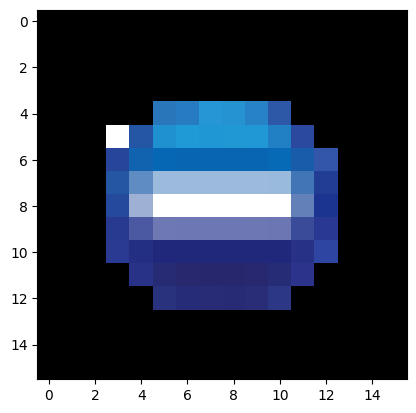

In [13]:
bytes_img1 = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x10\x00\x00\x00\x10\x08\x02\x00\x00\x00\x90\x91h6\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x00\xe3IDATx\x9cc`\x18~@\xb3l\xb7z\xf5\x01\xb5\xe9W\xd4&_To>\xa6\x13\xb1\x1c\xa7\xd2\xff\xff\xff\xab\x86-S\x98xA~\xd65\xf9\xe9W\xe4g\x00\xd1U\xc5\x86\xc3\xda\x9e\xf3\xb0kPw\x9b-\x94\xbc\x9e-c\x0b{\xea&8b\xcb\xda&\x19\xb3\xca8t\x15\x16\r*a\x8b\xe3{\x0f\xcf\xd9u\x1b\x19\xcd\xdau\xdb\xb1t\x9b\xa2\xdd\x14,\x1aT=\xe7\xcc\xdbp\xf9?\x06Hn\xd8)m2\x01\x8b\x06\r\xab\t\xde\x11\x8b\xf2*\xb7\xe4\x94o\x86\xa0\xdc\x8a\xcd\xd9e\x9b\xac\xbcgiXL\xc6\xa2A\xcbr\xa2\xb2~\x93\xbcF\x95\xbcF5\x12\xaaR7l\xd5s[\x84\xdd\xdf\x1aFm\xea\xda%\xea\x1ay\xea\xea\xb9 \xa4\x91\xaf\xaeS\xa6c\xdc\x85]5LO\xad\xbaN\xa5\x86N\xb9\xbav\x99&P\xb5y+>\xd5\x83\x03\x00\x00\x11\xc6m I\x97\xa9"\x00\x00\x00\x00IEND\xaeB`\x82'
        
img =  Image.open(io.BytesIO(bytes_img1))
plt.imshow(img)